# International Space Station Tracker

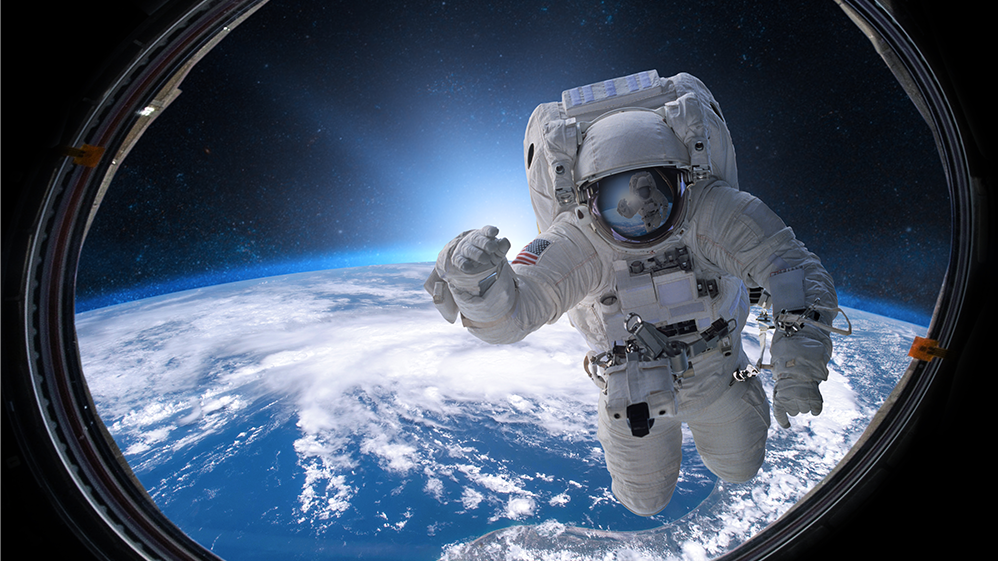

In [7]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

## ISS Live feed

https://www.nasa.gov/multimedia/nasatv/iss_ustream.html

Hello Friends,

Where is the International Space Station right now? Who is on board right now? Can we see what is going on up there right now?

The answers are yes, yes and yes. And you probably already know this as this all very poplar stuff.

So, in this free UDemy class

I'll show how to locate the international space Station in realtime, in space using Python and a rest API call. A Rest API is nothing more than A function - something just like you would do in Python or any other programing language, except that function livesOn the Internet.This meansYou can call it anywhereWhile you're on a beach using your phone and you'll be able to get the information– It is that awesome.

We'll also use that rest API call to find out exactly who is onboardThe ISS right now - remember, the ISS is permanantely crewed! That's crazy right, up there, there is a floating bus, 200 miles high, with antanas protruding and solar pannels, orbiting around us 15 times per day and, the astraunuts from all around teh world conduct scientific experiments , tis is straight out of a science fiction movie! Blows me away.

My name is Manuel Amunategui, you may knwo me as the host of the viralml show, at viralml.com, please sign up for my news;etter in the middle of the page so you become part of the community. Also plese review the class - i need that feedback to keep creating free class for the entire community to learn about data science and the world - let me know you like so I know that am doing the right or whether I should spend more time on my startup.

Let me outline the class so you know all the cool stuff you're going to learn.

We'll start by getting the names of the astraunots on board now, then we'll get the realtime location of the station and plot it on a good looking map wth the outline of each continent drawn so we can quickly recognize where it is.

We'll then kick things up by creatigna a data collector function to collect data for however long you want (or how much patience you have) Remember, in data science, data is critical, just as fuel is critical to a rocket!

Then we'll dig into some simple machine learning and look at two ways of forecasting the location of the space station, a very simple linear regression and something slightly more complex that better understands non-linear trajectories. nothing scary going on here.

We'll then move all the things we've learned to the internet, we're going to port into a real web applications that you will be able to reach from anywhere around the world using PythonAnywhere, the free cloud provider. There we will create a map in chartjs and plot the location of the ISS and a button to access the live ISS feed! to observe with the crew is up to right now.

Here is a look at the final app on a cell phone! looks just like a google play store or apple app store, doens't it!

This Is going to be a lot of fun, but I do expect you to konw some python basics like running a jupyter notebook and pip isnatll and Import Python libraries, but you don't have to have any statistics, Machine learning,Or flask skillsAs everything

So astronaouts, climb aboard, and let's have some fun!

# International Space Station Current Location

http://open-notify.org/Open-Notify-API/ISS-Location-Now/

The ISS programme is a joint project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada). The ownership and use of the space station is established by intergovernmental treaties and agreements.

The ISS serves as a microgravity and space environment research laboratory in which crew members conduct experiments in biology, physics, astronomy, and other fields.

This is all from Wikipedia.

Interesting facts
It was lauched over 2 decadeas on November 20th, 1998
It will operate up to 2030
It has two bathrooms, a gymnasium and a 360-degree bay window - wouldn't we all love to take a peek!
It orbits 15.5 perday... It flies at 4.791 miles per second. That's fast enough to go to the Moon and back in about a day.
Some 230 people have visited it,
It has a capactity for 6 people on board
They have to exercise some two hours a day to keep their muscles from atrophiating

# Who are the astronauts on board right now?

GO TO: http://open-notify.org/

In [8]:
# Who is in space right now?
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'},
  {'craft': 'ISS', 'name': 'Pyotr Dubrov'},
  {'craft': 'ISS', 'name': 'Anton Shkaplerov'},
  {'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'},
  {'craft': 'Shenzhou 13', 'name': 'Wang Yaping'},
  {'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'},
  {'craft': 'ISS', 'name': 'Raja Chari'},
  {'craft': 'ISS', 'name': 'Tom Marshburn'},
  {'craft': 'ISS', 'name': 'Kayla Barron'},
  {'craft': 'ISS', 'name': 'Matthias Maurer'}],
 'message': 'success',
 'number': 10}

# Where is the International Space Station right now?

In [39]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = (r.json())
print(space_station_location)

space_station_location['iss_position']['latitude']
space_station_location['iss_position']['longitude']
space_station_location['timestamp']

{'iss_position': {'longitude': '13.6183', 'latitude': '2.7548'}, 'message': 'success', 'timestamp': 1646300047}


1646300047

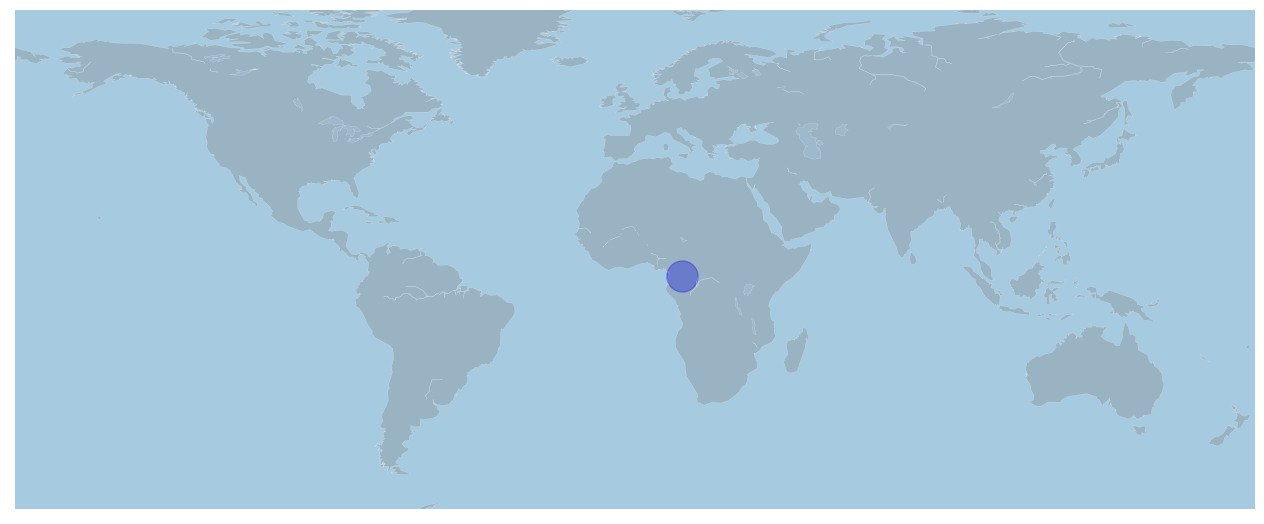

In [40]:
# let's plot the ISS current location
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")


m.scatter(float(space_station_location['iss_position']['longitude']), 
          float(space_station_location['iss_position']['latitude']), 
          s=500, alpha=0.4,color='blue')


#plt.title('International Space Station Location' , fontsize=30) 
plt.show()

# Collect data - try to let it run over

We know that it orbits 15.5 perday, so let it run at least 2 hours to collect enough data to see it go around the earth once.

## Run below code to get the data, you can remove or comment on record_data

In [ ]:
record_data = False
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()


    space_station_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        # dump copy to file
        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)

        # safety break
        if len(space_station_data) > 18000:
            break

        # let it sleep 60 seconds
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))

# Visualize the historical data

## Here i have used my .csv file 'ISS_location_20220303150754.csv'  which is generated after executing the above code. you can use your .csv file in place of it .

In [44]:
# load historical data
iss_flight_record = pd.read_csv('ISS_location_20220303150754.csv')
# translate timestamp into readable
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']] 

# add teh date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time

# add an plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
 
iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1646300160,-2.9586,17.6704,2022-03-03 15:06:00,1
1,1646300220,-6.0002,19.8447,2022-03-03 15:07:00,2
2,1646300279,-9.0053,22.0274,2022-03-03 15:07:59,3
3,1646300339,-12.0189,24.2695,2022-03-03 15:08:59,4
4,1646300400,-15.0093,26.5675,2022-03-03 15:10:00,5


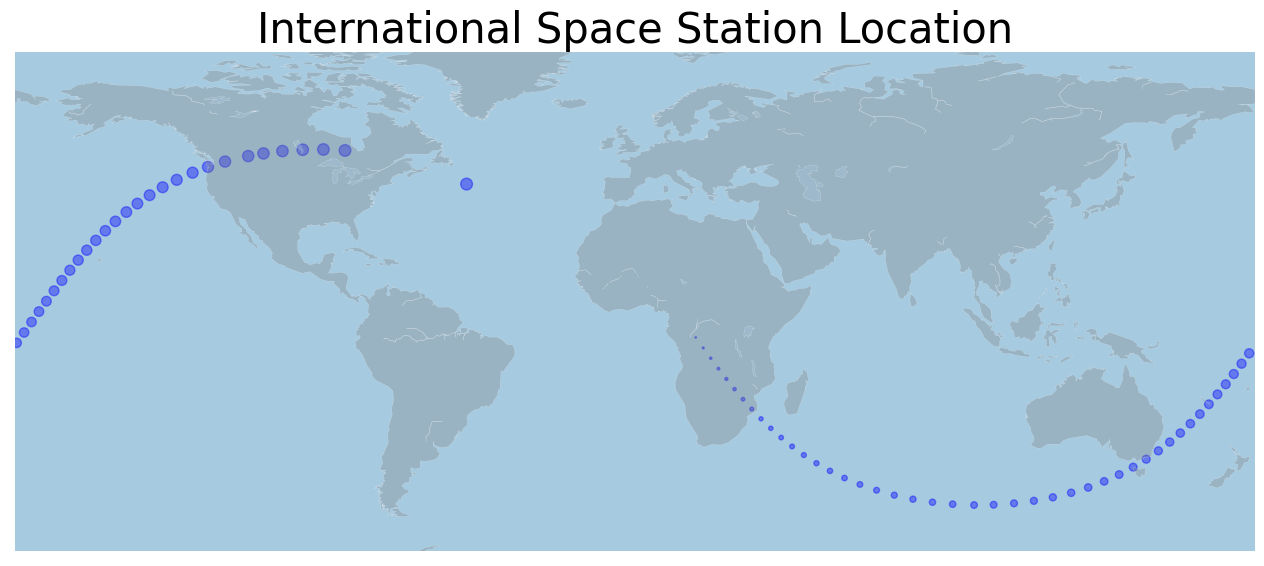

In [48]:
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

 
 
m.scatter(iss_flight_record['longitude'], 
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'] , alpha=0.4,color='blue')

 
plt.title('International Space Station Location' , fontsize=30)
plt.show()

# Let's Model the ISS Data!

In [49]:
# each dot represents one minute - can we predict where it will be in the next 10 minutes?
tmp_df = iss_flight_record.tail(10)
tmp_df

,timestamp,latitude,longitude,date,index
62,1646303883,44.8764,-128.3978,2022-03-03 16:08:03,63
63,1646303940,46.5615,-123.9344,2022-03-03 16:09:00,64
64,1646303999,48.1019,-118.9732,2022-03-03 16:09:59,65
65,1646304075,49.6940,-112.2563,2022-03-03 16:11:15,66
66,1646304123,50.4666,-107.8161,2022-03-03 16:12:03,67
67,1646304180,51.1419,-102.3125,2022-03-03 16:13:00,68
68,1646304239,51.5388,-96.4251,2022-03-03 16:13:59,69
69,1646304299,51.6102,-90.4242,2022-03-03 16:14:59,70
70,1646304363,51.3280,-84.1515,2022-03-03 16:16:03,71
71,1646304780,41.5674,-48.8545,2022-03-03 16:23:00,72


In [50]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  45.678188177379326
slope:  -0.029702480308934097


The regression equation is the equation of the line-of-best-fit from our regression model. The formula is common and can be seen in most statistic books:

y^ = a + bx

“y” is the dependent variable, or what we're trying to predict, in our case, a new latitude point, a is the intercept, “β” is the slope of the line and “x” is the independent variable.

In [51]:
# predict longitude 1 periods out
predicted_latitude = np.ceil(slope * 20 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: 46.0


In [53]:
# approximate 10 periods out 
predicted_latitude = np.ceil(slope * 60 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: 44.0


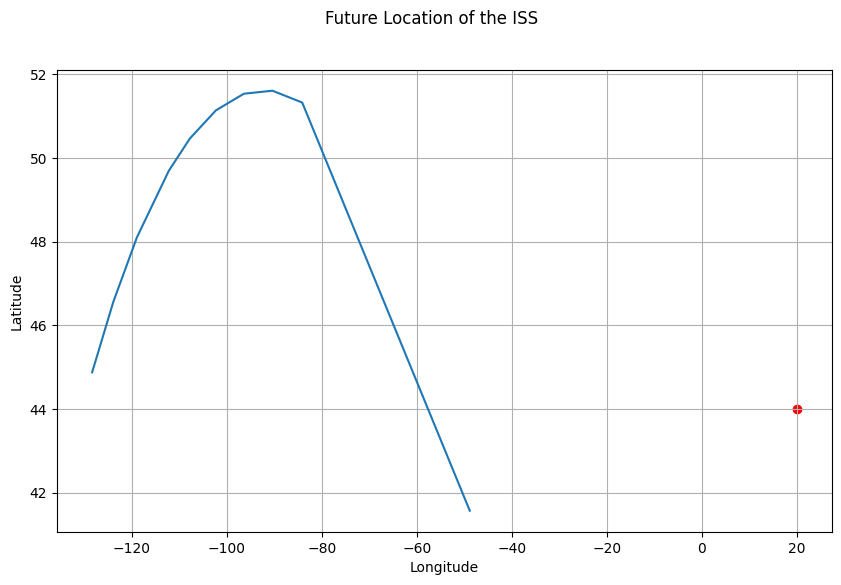

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')
plt.show()

# Polynomial Regression

https://www.w3schools.com/python/python_ml_polynomial_regression.asp

"...polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x"

https://en.wikipedia.org/wiki/Polynomial_regression

In [57]:
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3))

predicted_latitude =  poly_regression(20)

print('Next predicted point:', predicted_latitude)

Next predicted point: -13.303403241708429


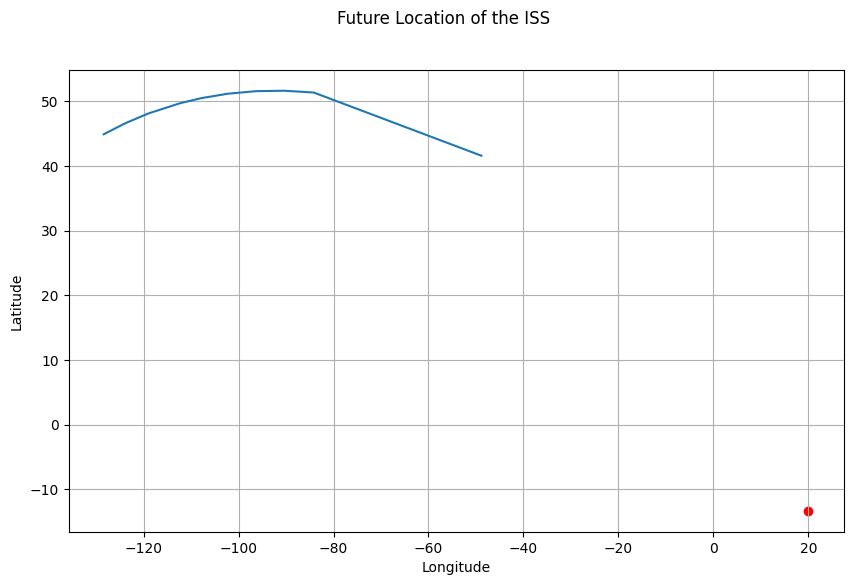

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')
plt.show()